https://www.statsmodels.org/stable/user-guide.html#time-series-analysis

# Time Series Analysis

## Descriptive Statistics and Tests

In [3]:
from statsmodels.tsa.api import acf
from statsmodels.tsa.api import pacf
from statsmodels.tsa.api import ccf

## Estimation

### Univariate Autoregressive Processes (AR)

### Autoregressive Moving-Average Processes (ARMA)

### Exponential Smoothing

## TSA Tools

## Seasonal-Trend decomposition using LOESS (STL)

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()
sns.set_style("darkgrid")

In [6]:
plt.rc("figure", figsize=(16, 12))
plt.rc("font", size=13)

In [7]:
co2 = [
    315.58,
    316.39,
    316.79,
    317.82,
    318.39,
    318.22,
    316.68,
    315.01,
    314.02,
    313.55,
    315.02,
    315.75,
    316.52,
    317.10,
    317.79,
    319.22,
    320.08,
    319.70,
    318.27,
    315.99,
    314.24,
    314.05,
    315.05,
    316.23,
    316.92,
    317.76,
    318.54,
    319.49,
    320.64,
    319.85,
    318.70,
    316.96,
    315.17,
    315.47,
    316.19,
    317.17,
    318.12,
    318.72,
    319.79,
    320.68,
    321.28,
    320.89,
    319.79,
    317.56,
    316.46,
    315.59,
    316.85,
    317.87,
    318.87,
    319.25,
    320.13,
    321.49,
    322.34,
    321.62,
    319.85,
    317.87,
    316.36,
    316.24,
    317.13,
    318.46,
    319.57,
    320.23,
    320.89,
    321.54,
    322.20,
    321.90,
    320.42,
    318.60,
    316.73,
    317.15,
    317.94,
    318.91,
    319.73,
    320.78,
    321.23,
    322.49,
    322.59,
    322.35,
    321.61,
    319.24,
    318.23,
    317.76,
    319.36,
    319.50,
    320.35,
    321.40,
    322.22,
    323.45,
    323.80,
    323.50,
    322.16,
    320.09,
    318.26,
    317.66,
    319.47,
    320.70,
    322.06,
    322.23,
    322.78,
    324.10,
    324.63,
    323.79,
    322.34,
    320.73,
    319.00,
    318.99,
    320.41,
    321.68,
    322.30,
    322.89,
    323.59,
    324.65,
    325.30,
    325.15,
    323.88,
    321.80,
    319.99,
    319.86,
    320.88,
    322.36,
    323.59,
    324.23,
    325.34,
    326.33,
    327.03,
    326.24,
    325.39,
    323.16,
    321.87,
    321.31,
    322.34,
    323.74,
    324.61,
    325.58,
    326.55,
    327.81,
    327.82,
    327.53,
    326.29,
    324.66,
    323.12,
    323.09,
    324.01,
    325.10,
    326.12,
    326.62,
    327.16,
    327.94,
    329.15,
    328.79,
    327.53,
    325.65,
    323.60,
    323.78,
    325.13,
    326.26,
    326.93,
    327.84,
    327.96,
    329.93,
    330.25,
    329.24,
    328.13,
    326.42,
    324.97,
    325.29,
    326.56,
    327.73,
    328.73,
    329.70,
    330.46,
    331.70,
    332.66,
    332.22,
    331.02,
    329.39,
    327.58,
    327.27,
    328.30,
    328.81,
    329.44,
    330.89,
    331.62,
    332.85,
    333.29,
    332.44,
    331.35,
    329.58,
    327.58,
    327.55,
    328.56,
    329.73,
    330.45,
    330.98,
    331.63,
    332.88,
    333.63,
    333.53,
    331.90,
    330.08,
    328.59,
    328.31,
    329.44,
    330.64,
    331.62,
    332.45,
    333.36,
    334.46,
    334.84,
    334.29,
    333.04,
    330.88,
    329.23,
    328.83,
    330.18,
    331.50,
    332.80,
    333.22,
    334.54,
    335.82,
    336.45,
    335.97,
    334.65,
    332.40,
    331.28,
    330.73,
    332.05,
    333.54,
    334.65,
    335.06,
    336.32,
    337.39,
    337.66,
    337.56,
    336.24,
    334.39,
    332.43,
    332.22,
    333.61,
    334.78,
    335.88,
    336.43,
    337.61,
    338.53,
    339.06,
    338.92,
    337.39,
    335.72,
    333.64,
    333.65,
    335.07,
    336.53,
    337.82,
    338.19,
    339.89,
    340.56,
    341.22,
    340.92,
    339.26,
    337.27,
    335.66,
    335.54,
    336.71,
    337.79,
    338.79,
    340.06,
    340.93,
    342.02,
    342.65,
    341.80,
    340.01,
    337.94,
    336.17,
    336.28,
    337.76,
    339.05,
    340.18,
    341.04,
    342.16,
    343.01,
    343.64,
    342.91,
    341.72,
    339.52,
    337.75,
    337.68,
    339.14,
    340.37,
    341.32,
    342.45,
    343.05,
    344.91,
    345.77,
    345.30,
    343.98,
    342.41,
    339.89,
    340.03,
    341.19,
    342.87,
    343.74,
    344.55,
    345.28,
    347.00,
    347.37,
    346.74,
    345.36,
    343.19,
    340.97,
    341.20,
    342.76,
    343.96,
    344.82,
    345.82,
    347.24,
    348.09,
    348.66,
    347.90,
    346.27,
    344.21,
    342.88,
    342.58,
    343.99,
    345.31,
    345.98,
    346.72,
    347.63,
    349.24,
    349.83,
    349.10,
    347.52,
    345.43,
    344.48,
    343.89,
    345.29,
    346.54,
    347.66,
    348.07,
    349.12,
    350.55,
    351.34,
    350.80,
    349.10,
    347.54,
    346.20,
    346.20,
    347.44,
    348.67,
]
co2 = pd.Series(
    co2, index=pd.date_range("1-1-1959", periods=len(co2), freq="M"), name="CO2"
)
co2.describe()


count    348.000000
mean     330.123879
std       10.059747
min      313.550000
25%      321.302500
50%      328.820000
75%      338.002500
max      351.340000
Name: CO2, dtype: float64

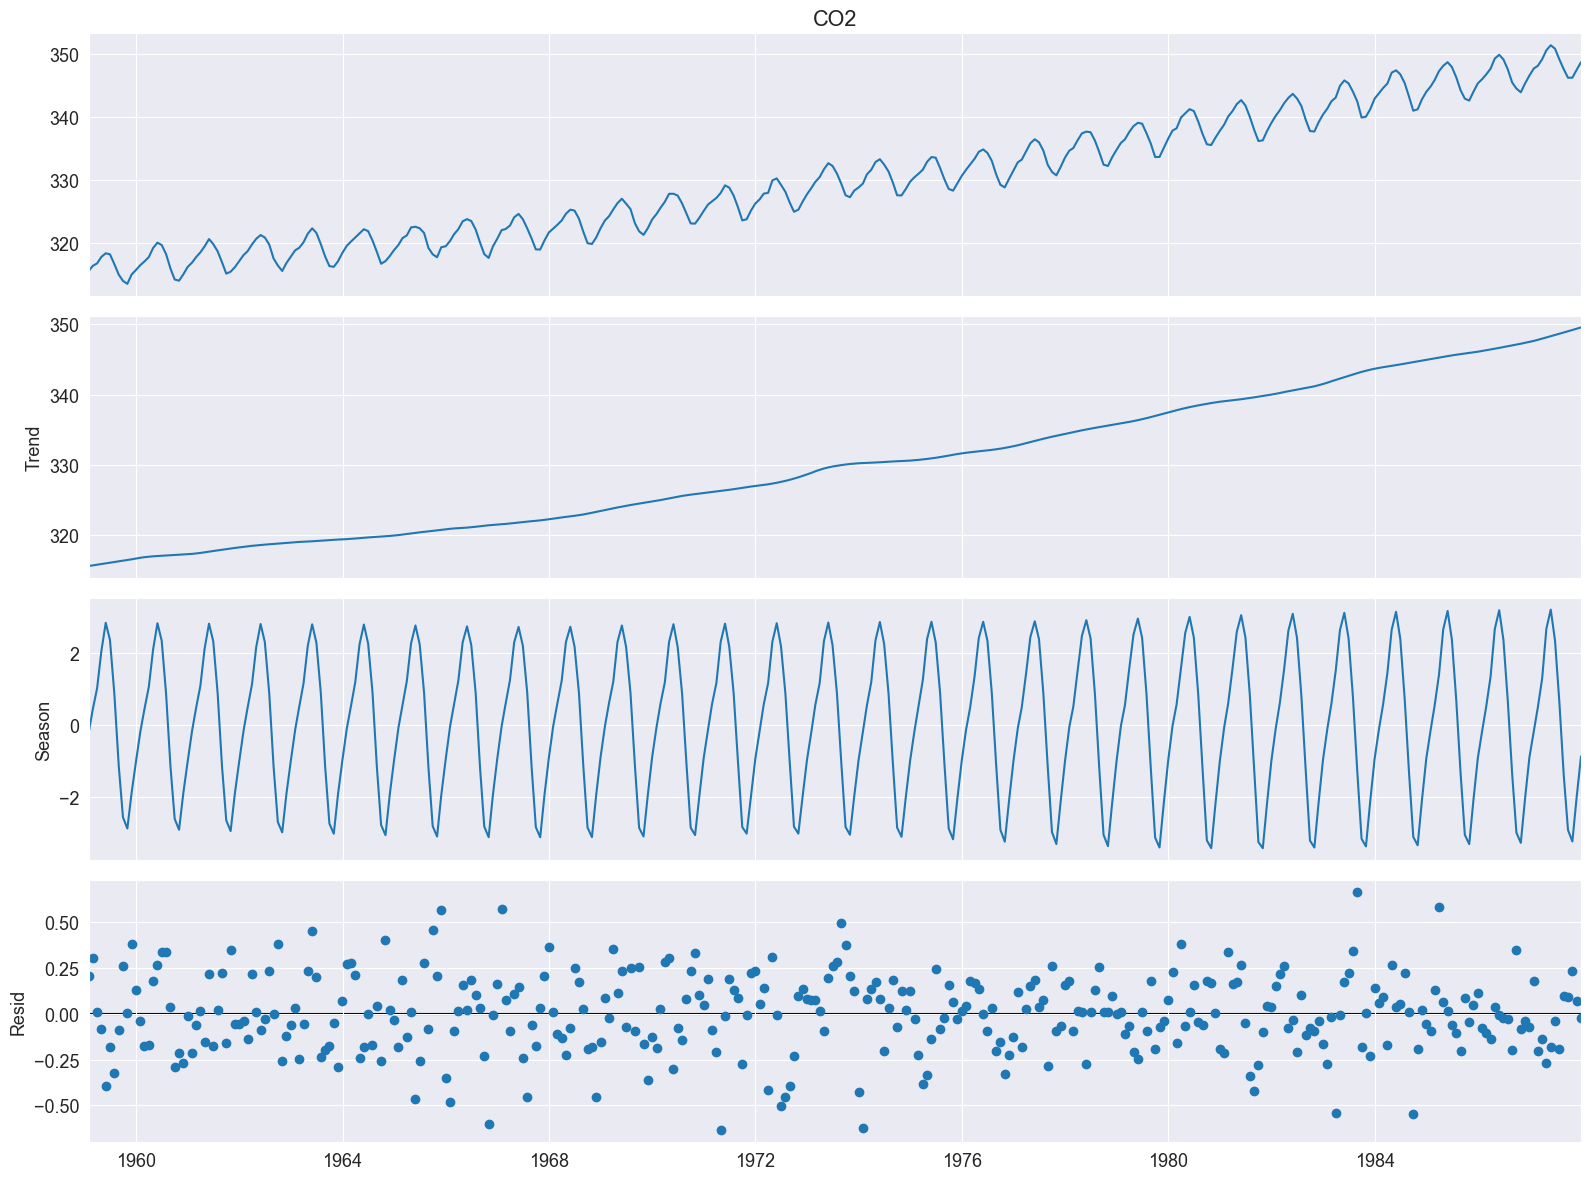

In [8]:
from statsmodels.tsa.seasonal import STL

# The decomposition requires 1 input, the data series. If the data series does 
# not have a frequency, then you must also specify period. The default value for 
# seasonal is 7, and so should also be changed in most applications.

stl = STL(co2, seasonal=13)
res = stl.fit()
fig = res.plot()

### Forecasting with STL

In [9]:
from statsmodels.datasets import elec_equip as ds

elec_equip = ds.load().data.iloc[:, 0]

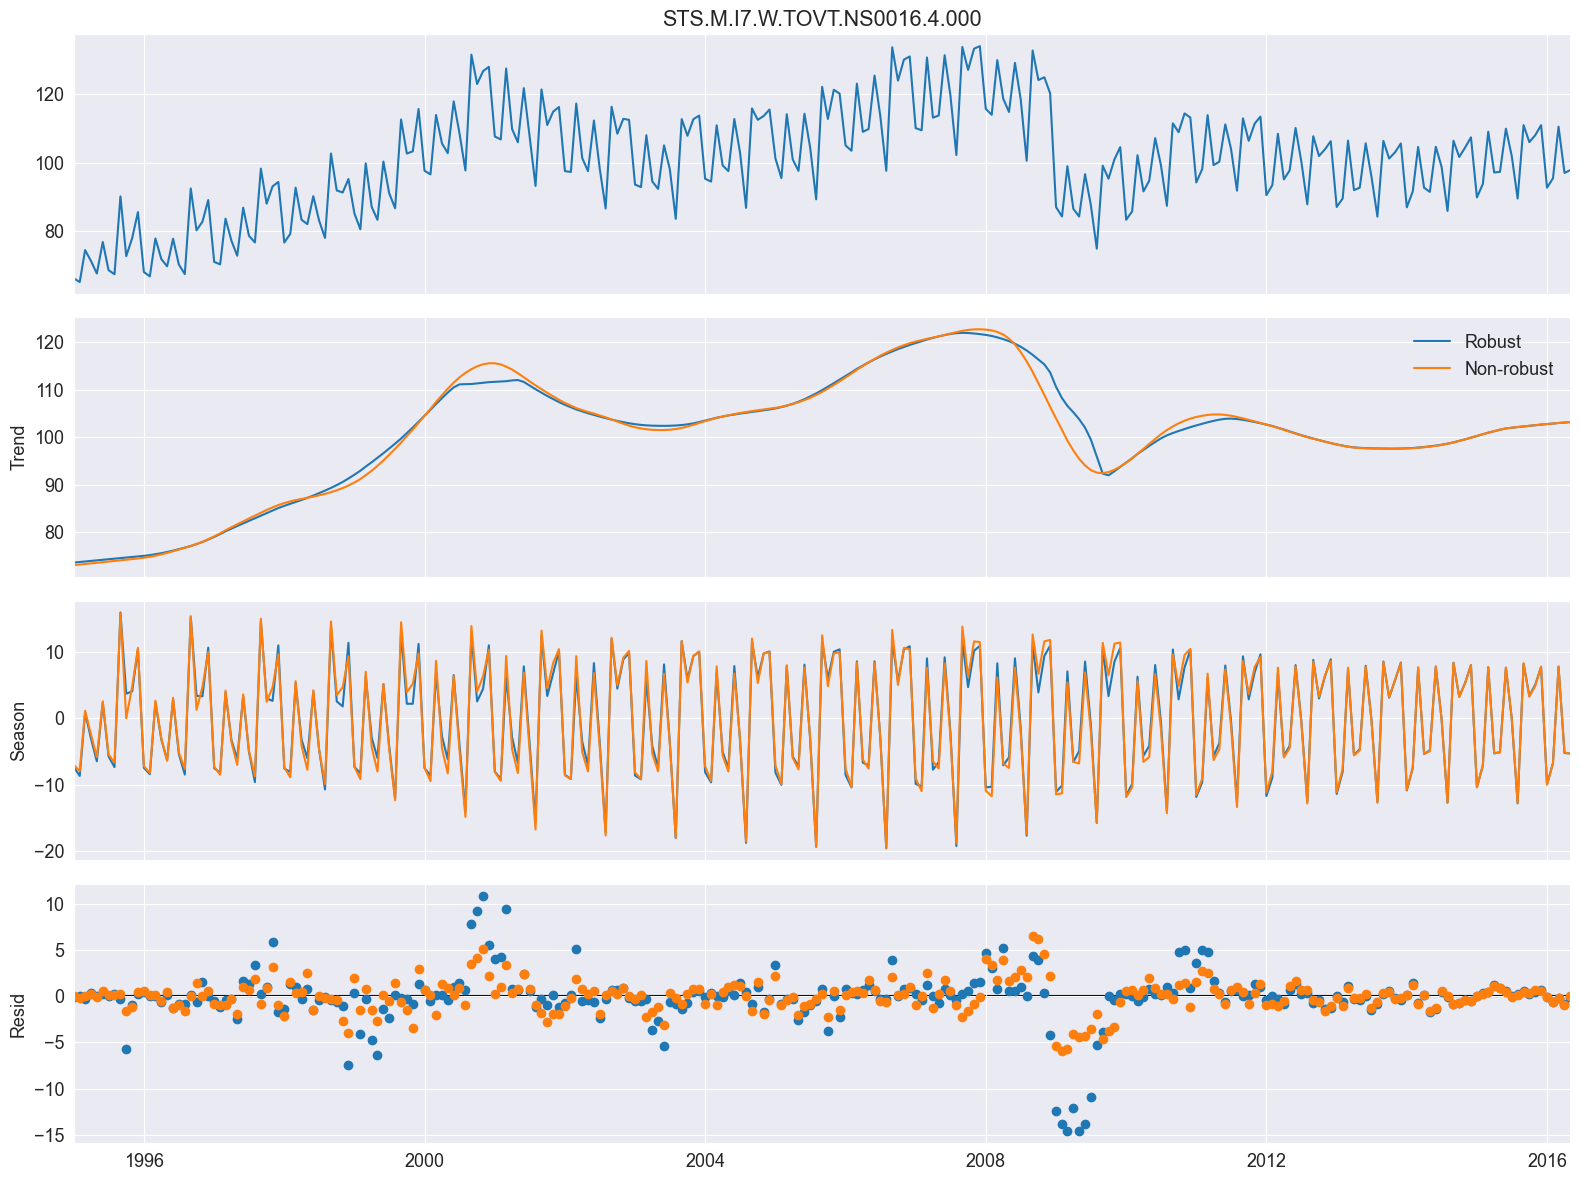

In [10]:
def add_stl_plot(fig, res, legend):
    """Add 3 plots from a second STL fit"""
    axs = fig.get_axes()
    comps = ["trend", "seasonal", "resid"]
    for ax, comp in zip(axs[1:], comps):
        series = getattr(res, comp)
        if comp == "resid":
            ax.plot(series, marker="o", linestyle="none")
        else:
            ax.plot(series)
            if comp == "trend":
                ax.legend(legend, frameon=False)

stl = STL(elec_equip, period=12, robust=True)
res_robust = stl.fit()
fig = res_robust.plot()
res_non_robust = STL(elec_equip, period=12, robust=False).fit()
add_stl_plot(fig, res_non_robust, ["Robust", "Non-robust"])


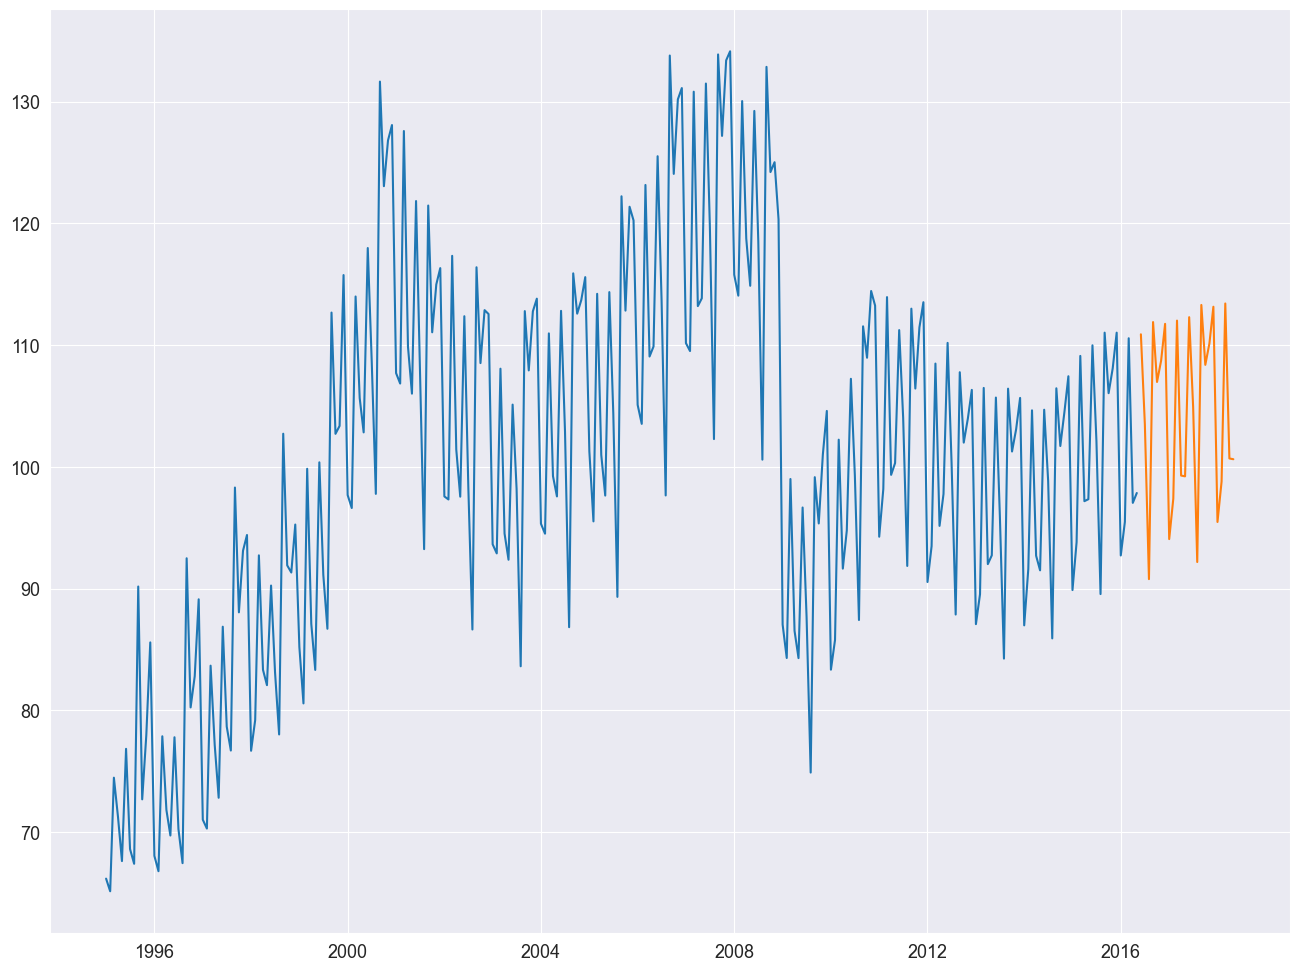

In [11]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.forecasting.stl import STLForecast

elec_equip.index.freq = elec_equip.index.inferred_freq
stlf = STLForecast(elec_equip, ARIMA, model_kwargs=dict(order=(1, 1, 0), trend="t"))
stlf_res = stlf.fit()

forecast = stlf_res.forecast(24)
plt.plot(elec_equip)
plt.plot(forecast)
plt.show()

In [12]:
print(stlf_res.summary())

                    STL Decomposition and SARIMAX Results                     
Dep. Variable:                      y   No. Observations:                  257
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -522.434
Date:                Wed, 12 Jul 2023   AIC                           1050.868
Time:                        18:22:48   BIC                           1061.504
Sample:                    01-01-1995   HQIC                          1055.146
                         - 05-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1171      0.118      0.995      0.320      -0.113       0.348
ar.L1         -0.0435      0.049     -0.880      0.379      -0.140       0.053
sigma2         3.4682      0.188     18.406      0.0

## Multiple Seasonal-Trend decomposition using LOESS (MSTL)

In [4]:
import matplotlib.pyplot as plt
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

from statsmodels.tsa.seasonal import MSTL
from statsmodels.tsa.seasonal import DecomposeResult

register_matplotlib_converters()
sns.set_style("darkgrid")

In [ ]:
plt.rc("figure", figsize=(16, 12))
plt.rc("font", size=13)

In [13]:
t = np.arange(1, 1000)
daily_seasonality = 5 * np.sin(2 * np.pi * t / 24)
weekly_seasonality = 10 * np.sin(2 * np.pi * t / (24 * 7))
trend = 0.0001 * t**2
y = trend + daily_seasonality + weekly_seasonality + np.random.randn(len(t))
ts = pd.date_range(start="2020-01-01", freq="H", periods=len(t))
df = pd.DataFrame(data=y, index=ts, columns=["y"])
df

,y
2020-01-01 00:00:00,1.161794
2020-01-01 01:00:00,3.481618
2020-01-01 02:00:00,4.600166
2020-01-01 03:00:00,6.507931
2020-01-01 04:00:00,5.221434
...,...
2020-02-11 10:00:00,95.939221
2020-02-11 11:00:00,95.528489
2020-02-11 12:00:00,95.831094
2020-02-11 13:00:00,93.184370


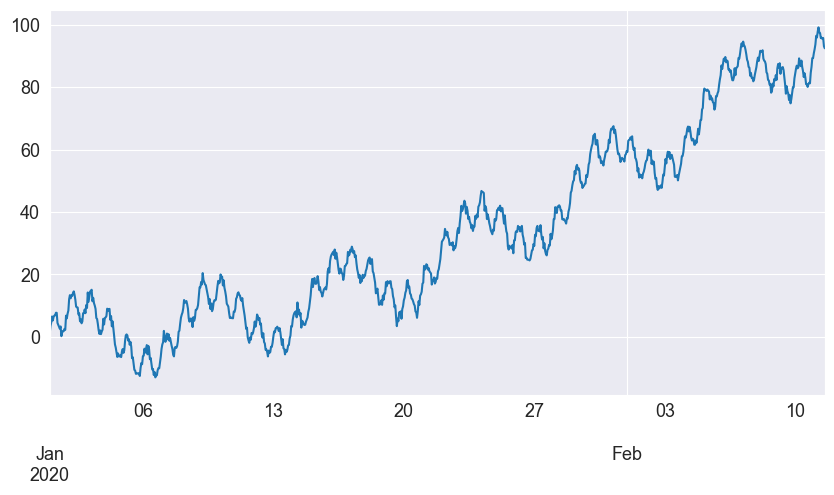

In [15]:
df["y"].plot(figsize=[10, 5]);

In [16]:
mstl = MSTL(df["y"], periods=[24, 24 * 7])
res = mstl.fit()


In [17]:
res.seasonal.head()

,seasonal_24,seasonal_168
2020-01-01 00:00:00,0.255965,1.192878
2020-01-01 01:00:00,3.069483,1.595154
2020-01-01 02:00:00,3.837848,1.553971
2020-01-01 03:00:00,4.532802,1.502544
2020-01-01 04:00:00,4.455296,1.653021


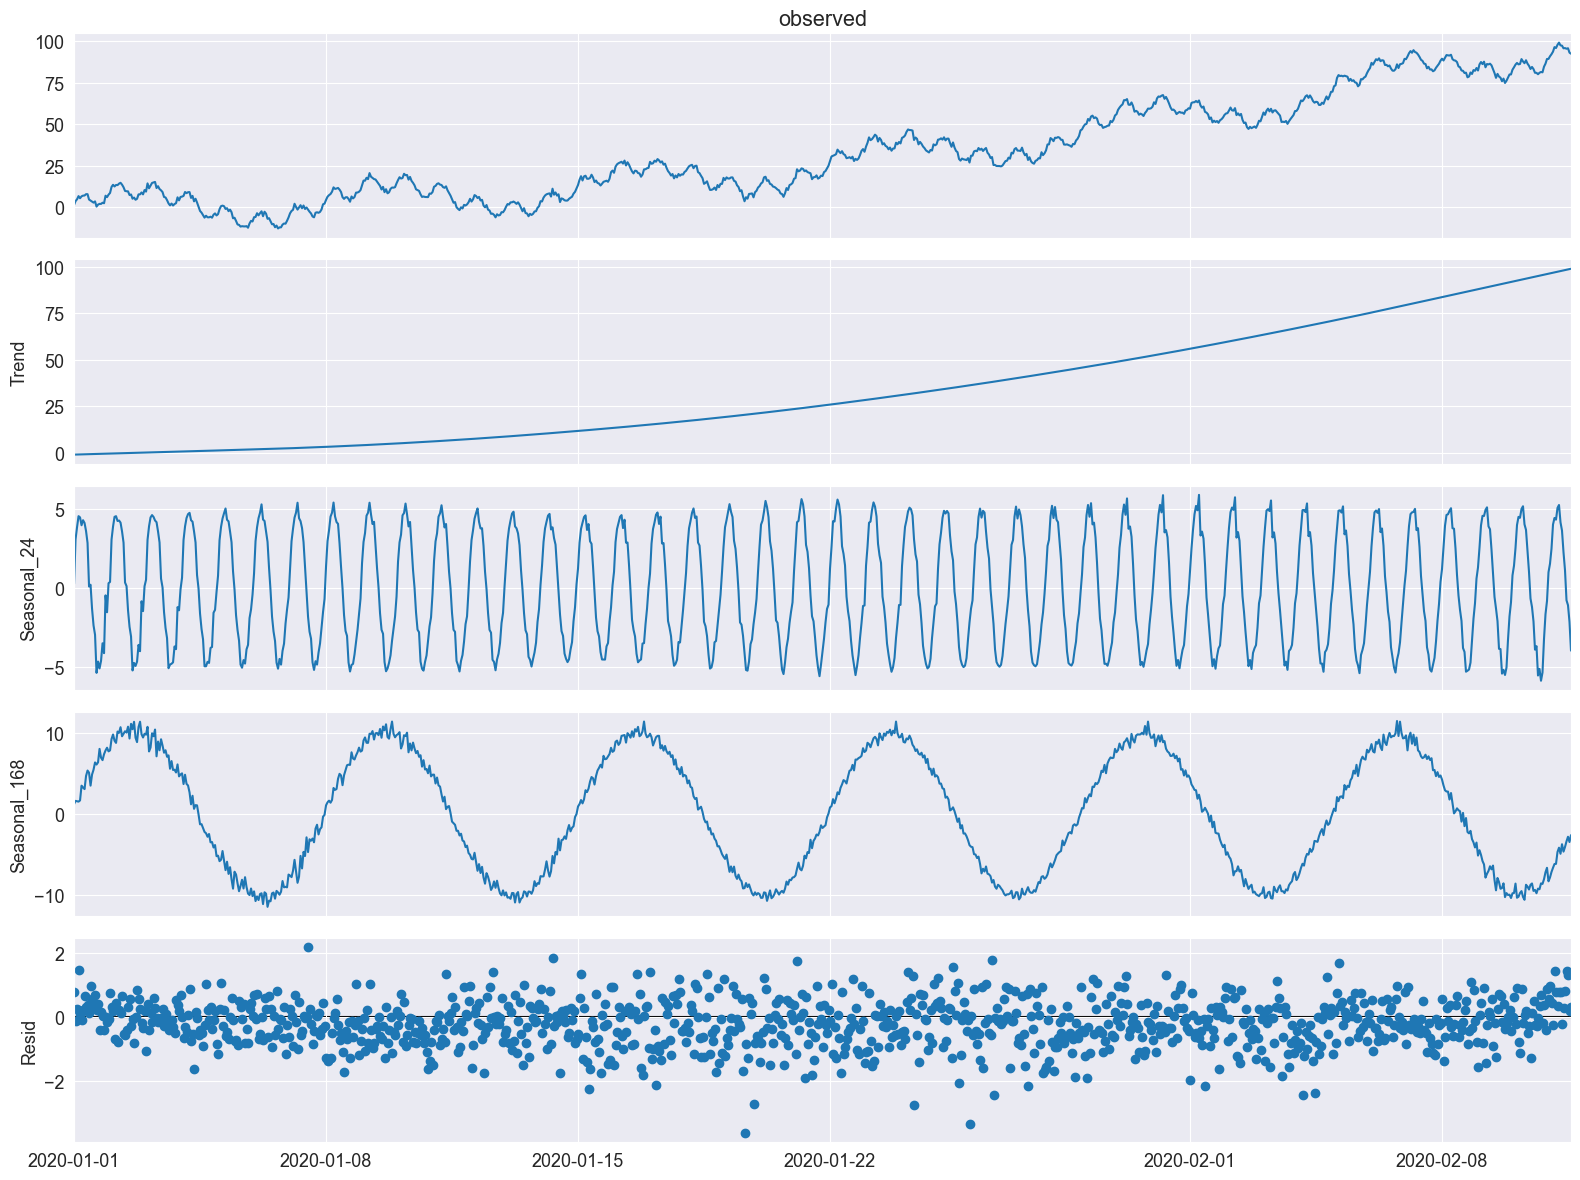

In [18]:
ax = res.plot()

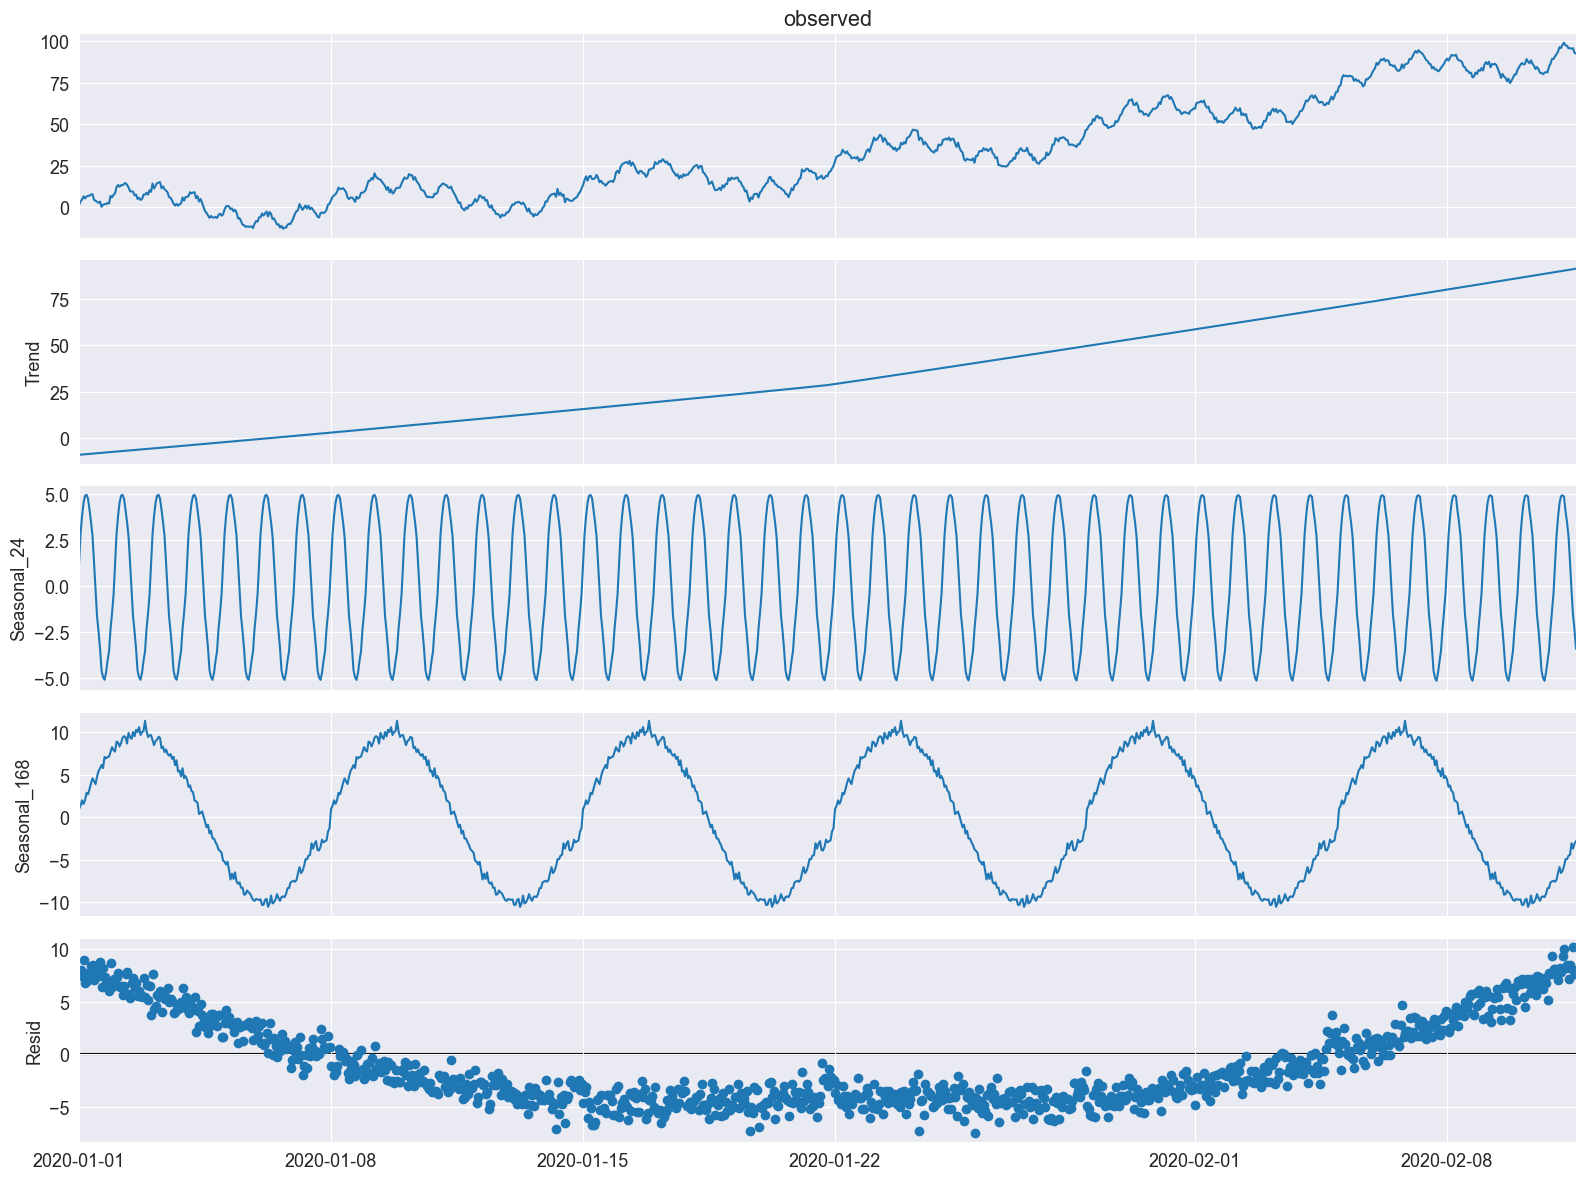

In [19]:
mstl = MSTL(
    df,
    periods=[24, 24 * 7],  # The periods and windows must be the same length and will correspond to one another.
    windows=[101, 101],  # Setting this large along with `seasonal_deg=0` will force the seasonality to be periodic.
    iterate=3,
    stl_kwargs={
                "trend":1001, # Setting this large will force the trend to be smoother.
                "seasonal_deg":0, # Means the seasonal smoother is fit with a moving average.
               }
)
res = mstl.fit()
ax = res.plot()


### MSTL applied to electricity demand dataset

In [20]:
url = "https://raw.githubusercontent.com/tidyverts/tsibbledata/master/data-raw/vic_elec/VIC2015/demand.csv"
df = pd.read_csv(url)

In [21]:
df.head()

,Date,Period,OperationalLessIndustrial,Industrial
0,37257,1,3535.867064,1086.132936
1,37257,2,3383.499028,1088.500972
2,37257,3,3655.527552,1084.472448
3,37257,4,3510.446636,1085.553364
4,37257,5,3294.697156,1081.302844


In [22]:
df["Date"] = df["Date"].apply(lambda x: pd.Timestamp("1899-12-30") + pd.Timedelta(x, unit="days"))
df["ds"] = df["Date"] + pd.to_timedelta((df["Period"]-1)*30, unit="m")

In [23]:
df.head()

,Date,Period,OperationalLessIndustrial,Industrial,ds
0,2002-01-01,1,3535.867064,1086.132936,2002-01-01 00:00:00
1,2002-01-01,2,3383.499028,1088.500972,2002-01-01 00:30:00
2,2002-01-01,3,3655.527552,1084.472448,2002-01-01 01:00:00
3,2002-01-01,4,3510.446636,1085.553364,2002-01-01 01:30:00
4,2002-01-01,5,3294.697156,1081.302844,2002-01-01 02:00:00


In [24]:
timeseries = df[["ds", "OperationalLessIndustrial"]]
timeseries.columns = ["ds", "y"] # Rename to OperationalLessIndustrial to y for simplicity.

# Filter for first 149 days of 2012.
start_date = pd.to_datetime("2012-01-01")
end_date = start_date + pd.Timedelta("149D")
mask = (timeseries["ds"] >= start_date) & (timeseries["ds"] < end_date)
timeseries = timeseries[mask]

# Resample to hourly
timeseries = timeseries.set_index("ds").resample("H").sum()
timeseries.head()


,y
ds,
2012-01-01 00:00:00,7926.529376
2012-01-01 01:00:00,7901.826990
2012-01-01 02:00:00,7255.721350
2012-01-01 03:00:00,6792.503352
2012-01-01 04:00:00,6635.984460


C:\Users\migue\AppData\Local\Temp\ipykernel_28648\2492336470.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


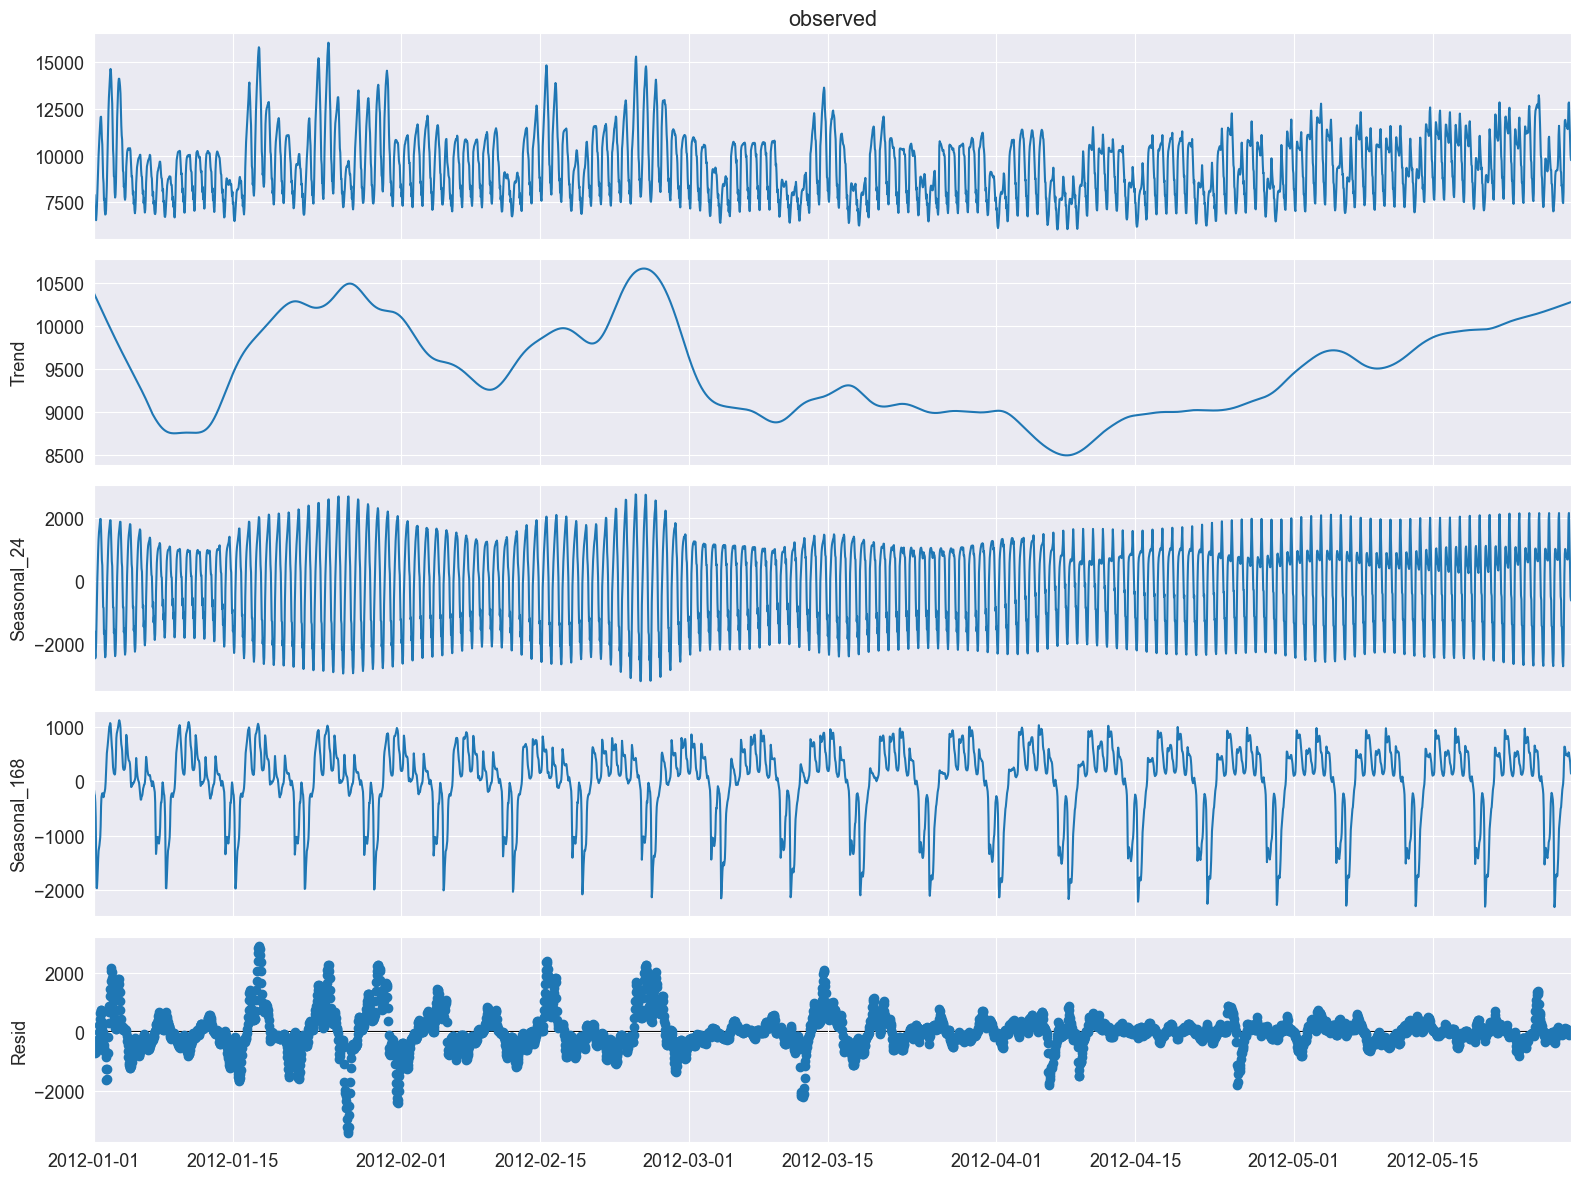

In [25]:
mstl = MSTL(timeseries["y"], periods=[24, 24 * 7], iterate=3, stl_kwargs={"seasonal_deg": 0,
                                                                          "inner_iter": 2,
                                                                          "outer_iter": 0})
res = mstl.fit() # Use .fit() to perform and return the decomposition
ax = res.plot()
plt.tight_layout()


In [26]:
res.seasonal.head()


,seasonal_24,seasonal_168
ds,,
2012-01-01 00:00:00,-1685.986297,-161.807086
2012-01-01 01:00:00,-1591.640845,-229.788887
2012-01-01 02:00:00,-2192.989492,-260.121300
2012-01-01 03:00:00,-2442.169359,-388.484499
2012-01-01 04:00:00,-2357.492551,-660.245476


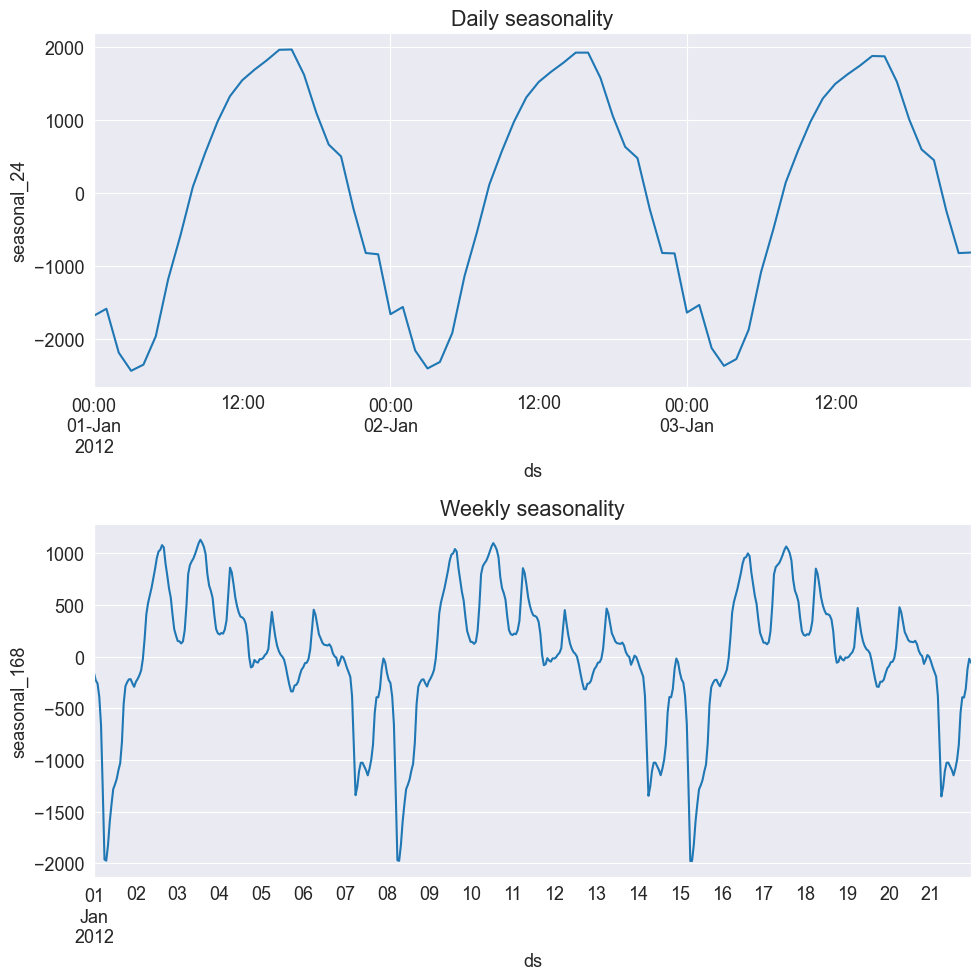

In [27]:
fig, ax = plt.subplots(nrows=2, figsize=[10,10])
res.seasonal["seasonal_24"].iloc[:24*3].plot(ax=ax[0])
ax[0].set_ylabel("seasonal_24")
ax[0].set_title("Daily seasonality")

res.seasonal["seasonal_168"].iloc[:24*7*3].plot(ax=ax[1])
ax[1].set_ylabel("seasonal_168")
ax[1].set_title("Weekly seasonality")

plt.tight_layout()


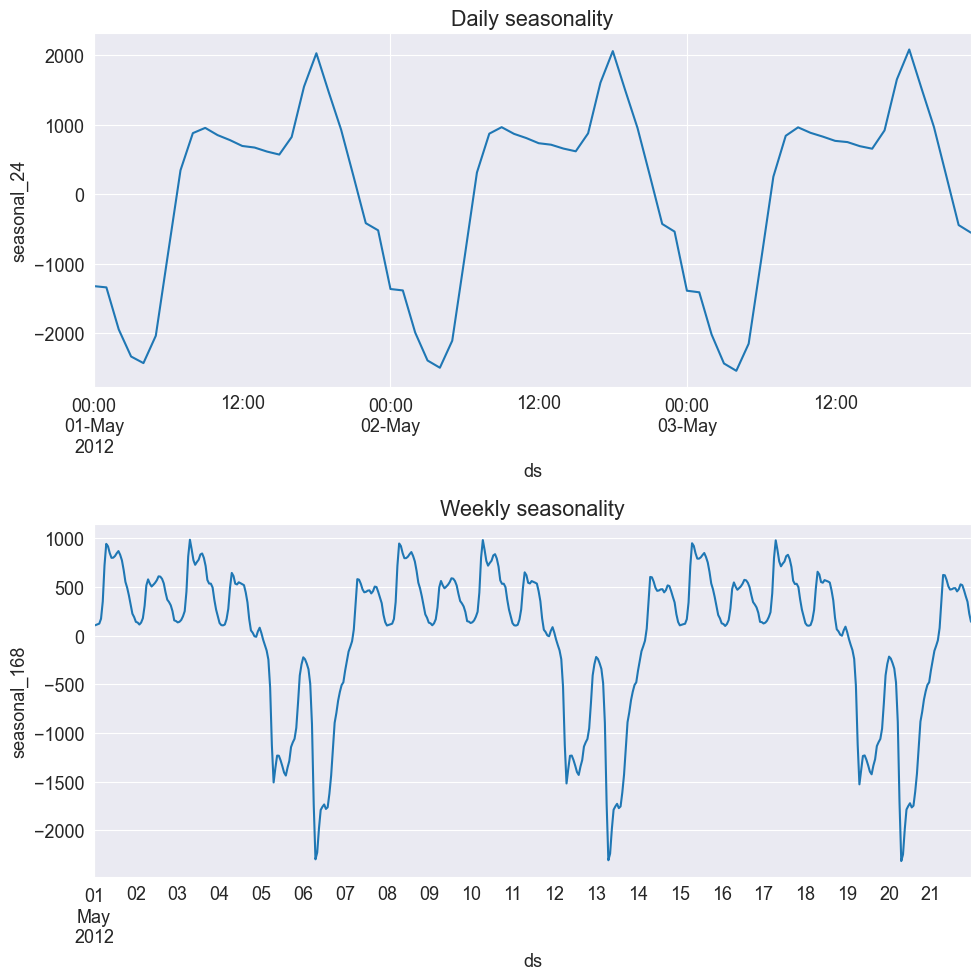

In [28]:
fig, ax = plt.subplots(nrows=2, figsize=[10,10])
mask = res.seasonal.index.month==5
res.seasonal[mask]["seasonal_24"].iloc[:24*3].plot(ax=ax[0])
ax[0].set_ylabel("seasonal_24")
ax[0].set_title("Daily seasonality")

res.seasonal[mask]["seasonal_168"].iloc[:24*7*3].plot(ax=ax[1])
ax[1].set_ylabel("seasonal_168")
ax[1].set_title("Weekly seasonality")

plt.tight_layout()


In [29]:
display(res.trend.head()) # trend component
display(res.resid.head()) # residual component


ds
2012-01-01 00:00:00    10373.942662
2012-01-01 01:00:00    10363.488489
2012-01-01 02:00:00    10353.037721
2012-01-01 03:00:00    10342.590527
2012-01-01 04:00:00    10332.147100
Freq: H, Name: trend, dtype: float64

ds
2012-01-01 00:00:00   -599.619903
2012-01-01 01:00:00   -640.231767
2012-01-01 02:00:00   -644.205579
2012-01-01 03:00:00   -719.433316
2012-01-01 04:00:00   -678.424613
Freq: H, Name: resid, dtype: float64

# State Space Methods

# Vector Autoregression